100%|██████████| 1000/1000 [00:14<00:00, 69.69it/s]


0.499


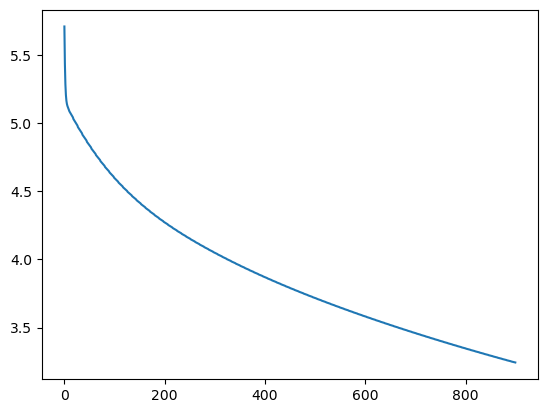

In [1]:
from os import chdir

import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A
def log_loss(A, y, epsilon=1e-15):
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))
def gradiens(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)
def update(dW, db, W, b, learing_rate):
    W = W - learing_rate * dW
    b = b - learing_rate * db
    return (W, b)

def artificial_neuron(X, y, learing_rate=0.1, n_iter=1000):
    W, b = initialisation(X)
    loss = []
    for _ in tqdm(range(n_iter)):
        A = model(X, W, b)
        if _ % 10:
            loss.append(log_loss(A, y))
        dW, db = gradiens(A, X, y)
        W, b = update(dW, db, W, b, learing_rate)
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    plt.plot(loss) ; plt.show()
    return (W, b)
def predict(X, W, b):
    A = model(X, W, b)
    # print(A*100)
    return A >= 0.5
def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels
    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    return X_train, y_train, X_test, y_test

chdir("/media/maelien/WEBER/prgm/Python/deep_learning")
(X_train, y_train, X_test, y_test) = load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test = X_test.reshape(X_test.shape[0], -1) / X_train.max()

(W, b) = artificial_neuron(X_train, y_train, learing_rate=0.01)
